In [2]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\revan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [23]:
# df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [53]:
skills_count = df_exploded.groupby([ 'job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [4]:
type(skills_count)

NameError: name 'skills_count' is not defined

In [37]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False
                                              )
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


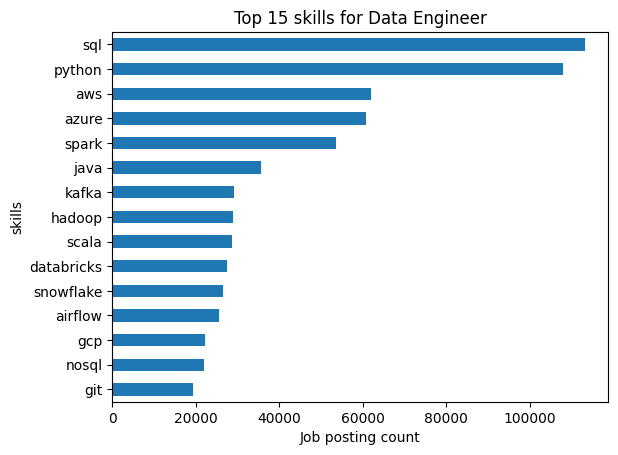

In [49]:
job_title = 'Data Engineer'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}')
plt.xlabel('Job posting count')
plt.ylabel('skills')
plt.legend().set_visible(False)